In [1]:
# Loading Libraries...
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data and displaying them...
data = pd.read_csv(r'..\dataset\Fertilizer_Simulated_Dataset.csv')
data

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.00,52.00,38.00,Sandy,Maize,37,0,0,Urea
1,29.00,52.00,45.00,Loamy,Sugarcane,12,0,36,DAP
2,34.00,65.00,62.00,Black,Cotton,7,9,30,14-35-14
3,32.00,62.00,34.00,Red,Tobacco,22,0,20,28-28
4,28.00,54.00,46.00,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
244,20.35,40.77,31.13,Sandy,Pomegranate,85,27,35,Urea
245,25.07,49.48,19.74,Clayey,Pomegranate,70,34,44,DAP
246,32.73,64.79,18.23,Clayey,Pomegranate,3,98,6,MOP
247,22.70,83.76,42.04,Loamy,Banana,64,72,52,NPK


In [3]:
# displaying data info...
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      249 non-null    float64
 1   Humidity         249 non-null    float64
 2   Moisture         249 non-null    float64
 3   Soil Type        249 non-null    object 
 4   Crop Type        249 non-null    object 
 5   Nitrogen         249 non-null    int64  
 6   Potassium        249 non-null    int64  
 7   Phosphorous      249 non-null    int64  
 8   Fertilizer Name  249 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 17.6+ KB
None


In [4]:
# Checking for missing values...
print(data.isnull().sum())

Temperature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


In [5]:
# Summary statistics for numerical columns...
print(data.describe())

       Temperature    Humidity    Moisture    Nitrogen   Potassium  \
count   249.000000  249.000000  249.000000  249.000000  249.000000   
mean     27.057590   57.227590   36.441084   35.397590   27.618474   
std       5.913828   16.496311   15.122563   27.679592   28.418868   
min      15.270000   20.760000    5.330000    0.000000    0.000000   
25%      22.680000   47.230000   25.780000   12.000000    0.000000   
50%      28.000000   58.000000   37.390000   24.000000   21.000000   
75%      32.000000   67.000000   48.000000   62.000000   41.000000   
max      38.000000   89.800000   65.000000  100.000000  100.000000   

       Phosphorous  
count   249.000000  
mean     31.493976  
std      21.006359  
min       0.000000  
25%      15.000000  
50%      30.000000  
75%      47.000000  
max      80.000000  


In [6]:
# Check unique values in categorical columns...
print("Unique Soil Types:",data['Soil Type'].unique())
print("Unique Crop Types:",data['Crop Type'].unique())
print("Unique Fertilizer Names:", data['Fertilizer Name'].unique())

Unique Soil Types: ['Sandy' 'Loamy' 'Black' 'Red' 'Clayey' 'Peaty' 'Silt' 'Chalky']
Unique Crop Types: ['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts' 'Grapes' 'PigeonPeas' 'Pomegranate'
 'Banana' 'Mango' 'Lentil' 'KidneyBeans' 'Blackgram' 'ChickPea' 'Rice']
Unique Fertilizer Names: ['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10/26/2026'
 'Ammonium Sulphate' 'MOP' 'SSP' 'NPK']


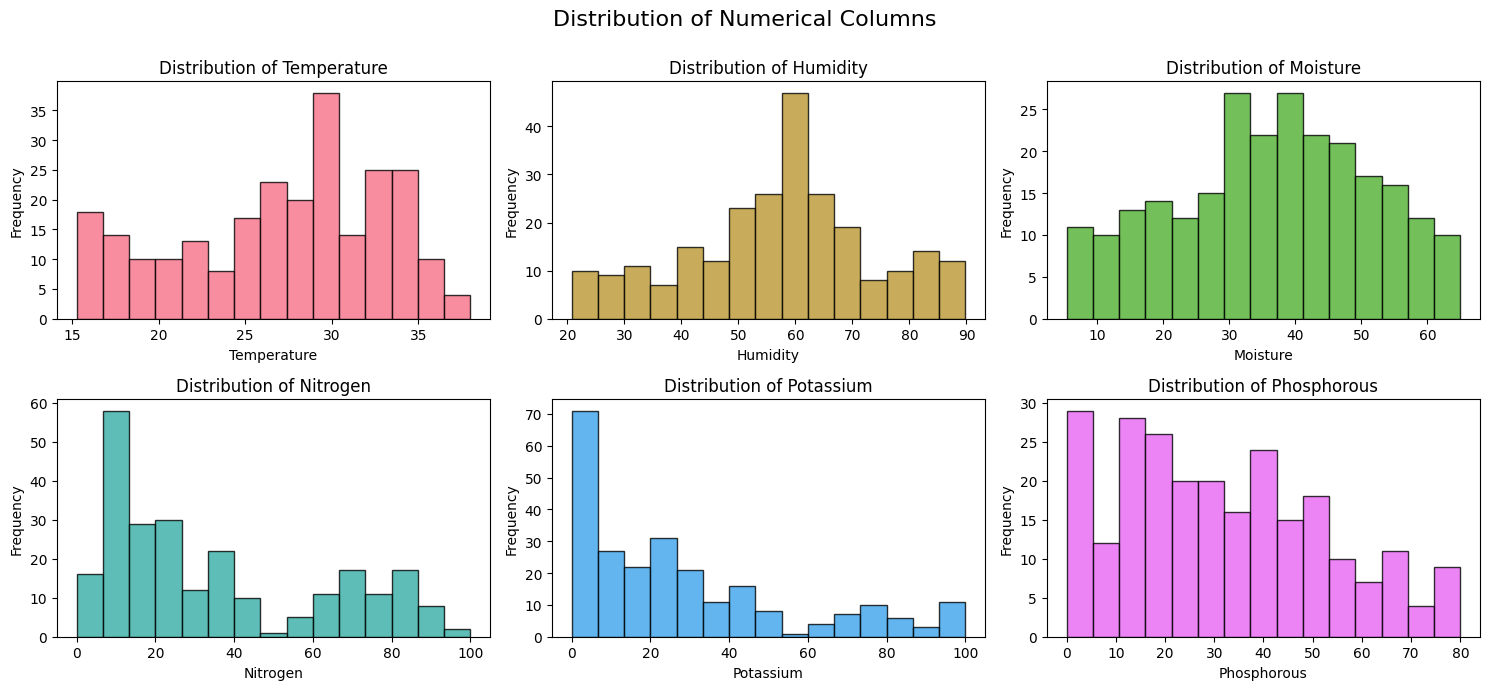

In [7]:
# List of colors for the histograms
numerical_columns = ['Temperature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
colors = sns.color_palette("husl", len(numerical_columns))

# Create subplots for numerical columns
fig, axes = plt.subplots(2, 3, figsize=(15, 7))  
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    axes[i].hist(data[column], bins=15, color=colors[i], edgecolor='black', alpha=0.8)
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Adjust layout and overall title
plt.suptitle("Distribution of Numerical Columns", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Leaves space for the suptitle
plt.show()

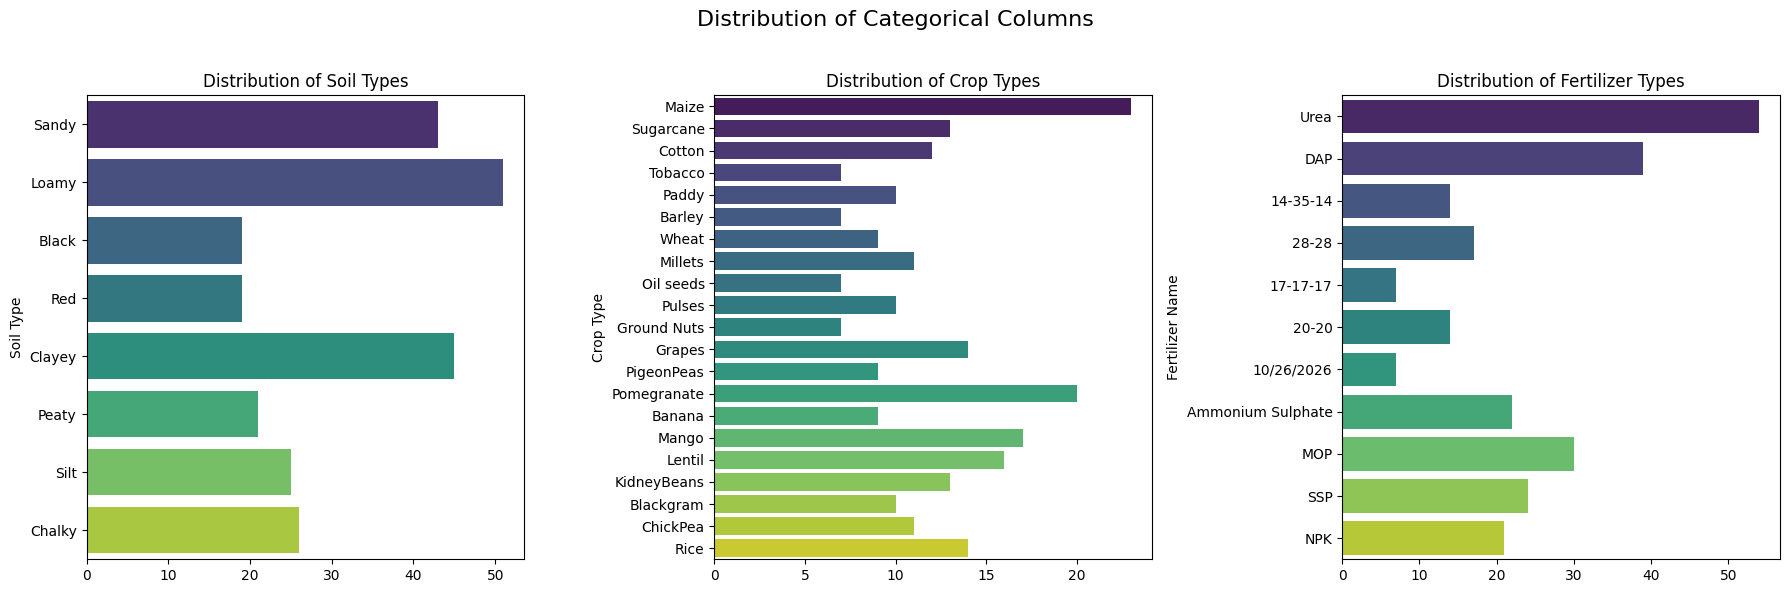

In [8]:
# Creating subplots for categorical distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Plot for Soil Type
sns.countplot(y='Soil Type', data=data, hue='Soil Type', palette="viridis", ax=axes[0], legend=False)
axes[0].set_title("Distribution of Soil Types")
axes[0].set_xlabel("")
axes[0].set_ylabel("Soil Type")

# Plot for Crop Type
sns.countplot(y='Crop Type', data=data, hue='Crop Type', palette="viridis", ax=axes[1], legend=False)
axes[1].set_title("Distribution of Crop Types")
axes[1].set_xlabel("")
axes[1].set_ylabel("Crop Type")

# Plot for Fertilizer Name
sns.countplot(y='Fertilizer Name', data=data, hue='Fertilizer Name', palette="viridis", ax=axes[2], legend=False)
axes[2].set_title("Distribution of Fertilizer Types")
axes[2].set_xlabel("")
axes[2].set_ylabel("Fertilizer Name")

# Adjusting layout and adding a main title
plt.tight_layout(rect=[0, 0, 1, 0.90]) 
plt.suptitle("Distribution of Categorical Columns", fontsize=16) 
plt.show()

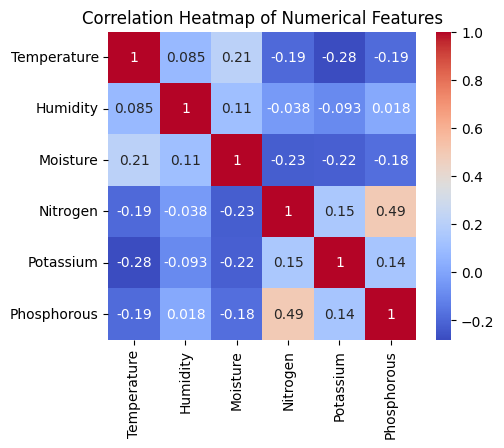

In [9]:
# Correlation heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

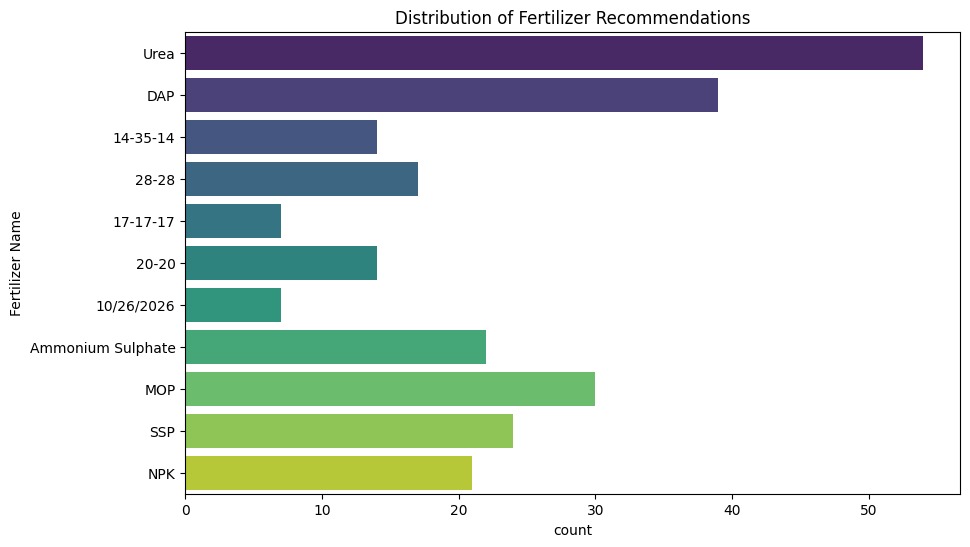

In [10]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(y='Fertilizer Name', data=data, palette="viridis", hue='Fertilizer Name')
plt.title("Distribution of Fertilizer Recommendations")
plt.show()

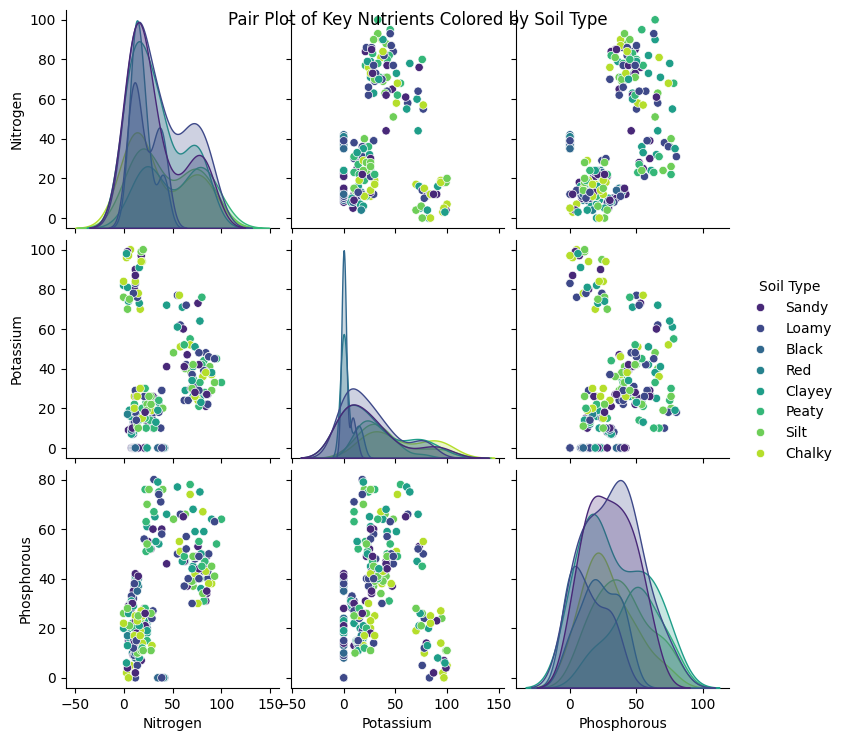

In [11]:
# Pair plot to explore interactions between Nitrogen, Potassium, and Phosphorous by Soil Type
sns.pairplot(data, vars=['Nitrogen', 'Potassium', 'Phosphorous'], hue='Soil Type', palette="viridis")
plt.suptitle("Pair Plot of Key Nutrients Colored by Soil Type")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [13]:
# Encode categorical features
label_encoders = {}
for col in ['Crop Type', 'Soil Type']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
X = data.drop('Fertilizer Name', axis=1)
y = data['Fertilizer Name']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [17]:
# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Predictions
y_pred = rf.predict(X_test)

In [19]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


In [20]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                    precision    recall  f1-score   support

       10/26/2026       0.50      1.00      0.67         1
         14-35-14       1.00      1.00      1.00         3
         17-17-17       1.00      1.00      1.00         1
            20-20       1.00      1.00      1.00         3
            28-28       1.00      1.00      1.00         3
Ammonium Sulphate       1.00      0.80      0.89         5
              DAP       0.78      0.88      0.82         8
              MOP       1.00      1.00      1.00         6
              NPK       1.00      1.00      1.00         4
              SSP       1.00      1.00      1.00         5
             Urea       0.90      0.82      0.86        11

         accuracy                           0.92        50
        macro avg       0.93      0.95      0.93        50
     weighted avg       0.93      0.92      0.92        50



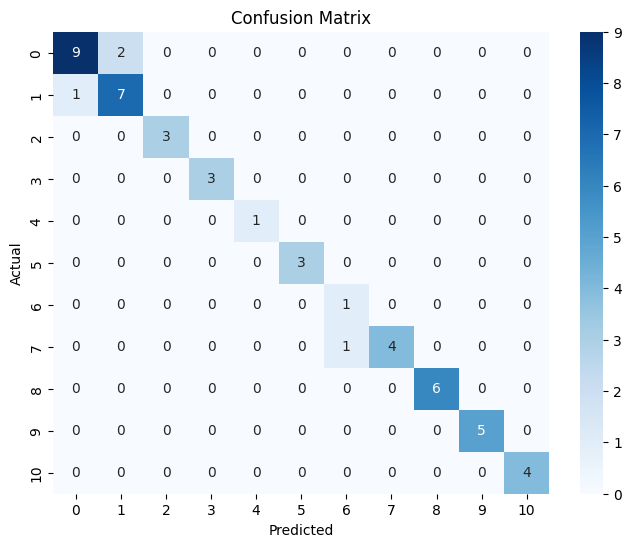

In [21]:
# Confusion Matrix
labels = y.unique()

conf_matrix = confusion_matrix(y_test, y_pred,labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [23]:
# Evaluate the best model
best_y_pred = best_rf.predict(X_test)
best_accuracy = accuracy_score(y_test, best_y_pred)
print(f"Best Model Accuracy: {best_accuracy:.2f}")

Best Model Accuracy: 0.88


       Feature  Importance
7  Phosphorous    0.263104
5     Nitrogen    0.262815
6    Potassium    0.255858
0  Temperature    0.056894
1     Humidity    0.054336
2     Moisture    0.047353
4    Crop Type    0.035492
3    Soil Type    0.024146


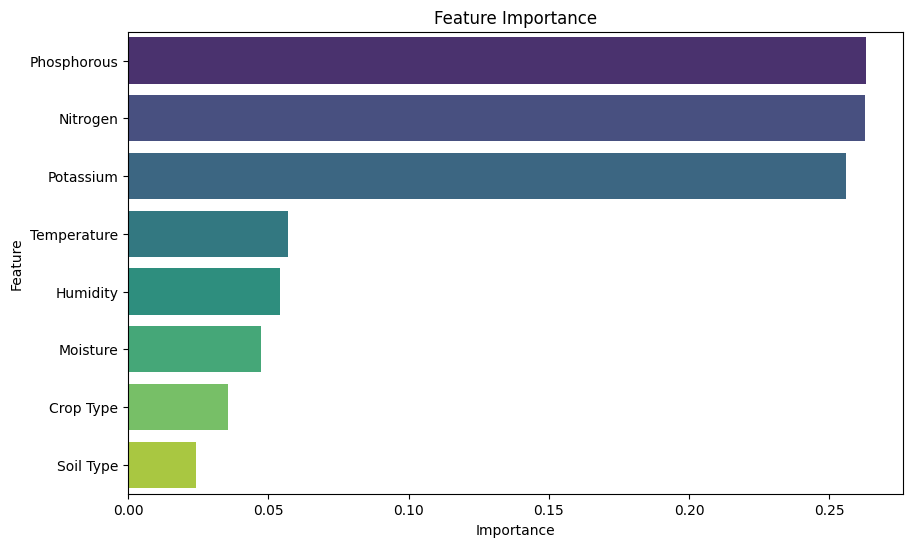

In [24]:
# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance")
plt.show()

In [25]:
import pickle
# Save the model as a pickle file
with open('../models/fertilizer_recommendation_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)